# **Context of this Notebook**

This NoteBook present all the models built to solve CO2 emission problem. All the models presented in report 2 can be found here. Here is the list of all the model presented

•	Regression:

o	Linear regression

o	Ridge

o	Lasso

•	Classification:

o	Logistic regression

o	SVM

o	KNN

o	Decision Tree

o	Decision Tree Boosting

o	Bagging

o	Random Forest

o	XgBoost

o	Deep Learning





In [41]:
# To set up Google Colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Oct  4 10:09:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   38C    P8              11W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [42]:
#To install SHAP in order to do the interpetability
!pip install shap

In [43]:
#To import different packages needed to run the Notebook
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
import scipy.stats as stats
import time
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import shap

In [44]:
#To mount Google drive because
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#To read the data from Google Drive
import os
# Path to "MyDrive" folder
my_drive_path = '/content/drive/MyDrive'
# Path to "Data_Scientest" folder
data_scientest_path = '/content/drive/MyDrive/Data_Scientest'
#Read the data coming from the Pre-processing phase
df = pd.read_csv(data_scientest_path+'/'+'numerical_data_2022_v2.csv')
df_2021 = pd.read_csv(data_scientest_path+'/'+'numerical_data_2021_v2.csv')


## **0. Quick data pre-processing**

### 0.1 Drop the Fuel Consumption

In [46]:
#Drop the Fuel consumption since
df.drop('Fuel consumption',axis=1,inplace=True)
df_2021 .drop('Fuel consumption',axis=1,inplace=True)
df_2021.head()

,Mass in running order (kg),WLTP test mass,Specific CO2 Emissions in g/km (WLTP),Engine capacity in cm3,Emissions reduction through IT in g/km (WLTP),Fuel type,Electric energy consumption in Wh/km,Engine power in KW
0,1337.0,1446.0,126.0,999.0,1.70,lpg,0.0,74.0
1,1670.0,1782.0,125.0,2487.0,0.80,petrol,0.0,131.0
2,1493.0,1576.0,135.0,1199.0,2.00,petrol,0.0,96.0
3,1649.0,1814.0,131.0,1598.0,0.59,petrol,0.0,132.0
4,1560.0,1640.0,118.0,1987.0,0.80,petrol,0.0,112.0


### 0.2 High level check on the data

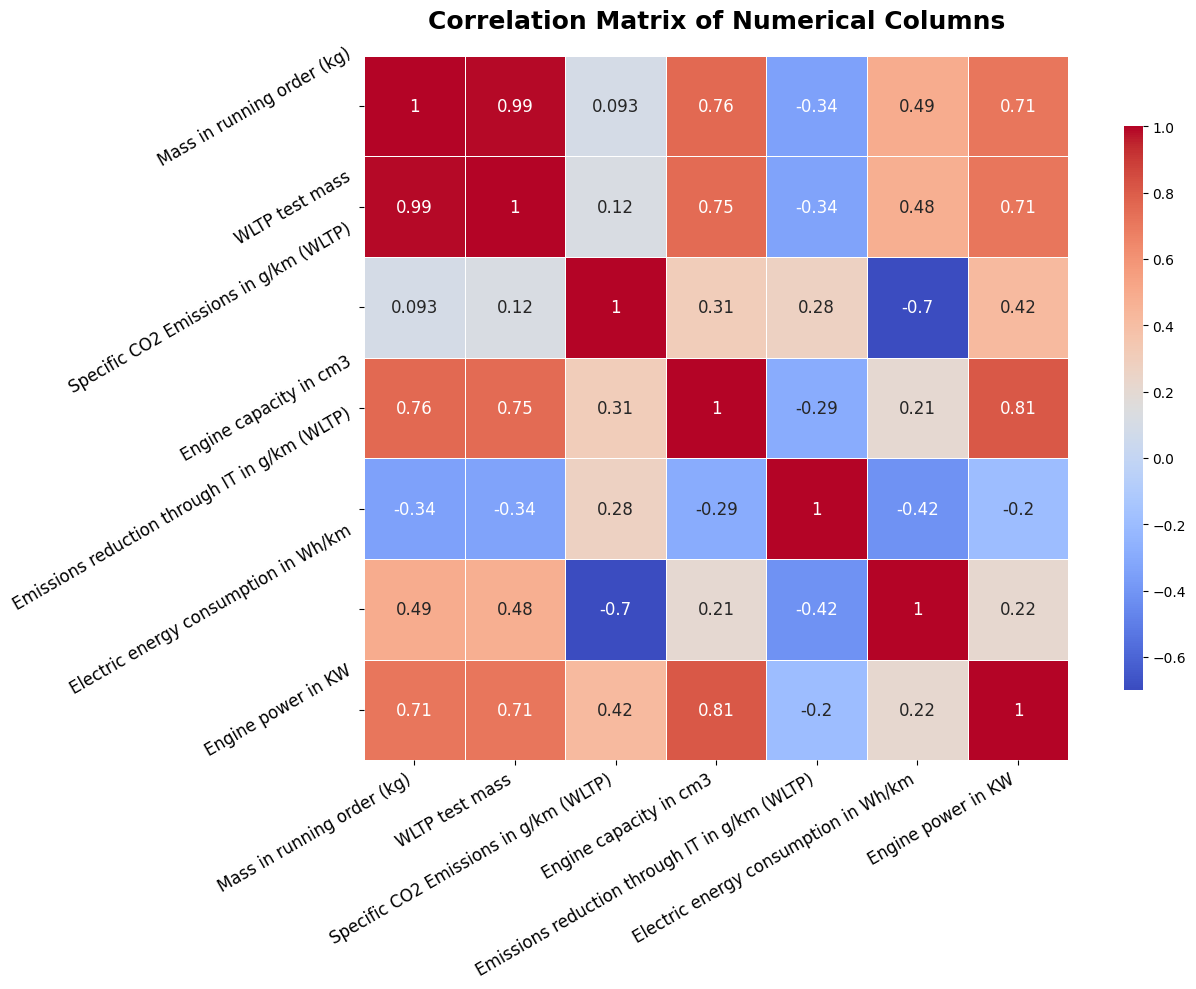

In [47]:
# Compute the correlation matrix
numerical_df = df.select_dtypes(include='number')

correlation_matrix = numerical_df.corr()

# Plot the heatmap with enhanced aesthetics
plt.figure(figsize=(14, 10))  # Larger figure size for better readability
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,             # Show the correlation values
                      cmap='coolwarm',        # Color map
                      linewidths=0.5,         # Add lines between squares
                      annot_kws={"size": 12}, # Adjust the font size of annotations
                      cbar_kws={"shrink": 0.8, "aspect": 30}, # Adjust the colorbar
                      square=True)            # Keep the squares square-shaped

# Rotate the x and y axis labels to 45 degrees
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(rotation=30, fontsize=12)

# Title with a bigger font size and bold
plt.title('Correlation Matrix of Numerical Columns', fontsize=18, fontweight='bold', pad=20)

# Adjust layout to make sure everything fits without overlapping
plt.tight_layout()

# Save the plot as a high-resolution PNG image
plt.savefig('correlation_matrix_report.png', format='png', dpi=300)

# Show the plot
plt.show()

In [48]:
#Dropping one of of two masses present in the data set
df_selected=df.drop('Mass in running order (kg)', axis=1)
df_selected_2021=df_2021.drop('Mass in running order (kg)', axis=1)

In [49]:
#Remove all the NaN from the data
df_selected_2021=df_selected_2021.dropna()

In [50]:
# Change the categorical data on fuel type to use in the model
print(df_selected['Fuel type'].unique())
df_encoded = pd.get_dummies(df_selected, columns=['Fuel type'],  dtype=int)
df_encoded_2021 = pd.get_dummies(df_selected_2021, columns=['Fuel type'], dtype=int)
df_encoded.tail()

['lpg' 'petrol' 'diesel' 'e85' 'petrol/electric' 'diesel/electric']


,WLTP test mass,Specific CO2 Emissions in g/km (WLTP),Engine capacity in cm3,Emissions reduction through IT in g/km (WLTP),Electric energy consumption in Wh/km,Engine power in KW,Fuel type_diesel,Fuel type_diesel/electric,Fuel type_e85,Fuel type_lpg,Fuel type_petrol,Fuel type_petrol/electric
7047740,2140.0,193.0,1997.0,1.1,0.0,106.0,1,0,0,0,0,0
7047741,1574.0,106.0,1798.0,0.6,0.0,72.0,0,0,0,0,1,0
7047742,1753.0,16.0,1987.0,0.0,126.0,111.0,0,0,0,0,0,1
7047743,2162.0,22.0,2487.0,0.0,171.0,136.0,0,0,0,0,0,1
7047744,2162.0,22.0,2487.0,0.0,166.0,136.0,0,0,0,0,0,1


In [51]:
# Check the data to see how many elements are within there
df_encoded.head(10)
df_encoded_2021.head(10)

,WLTP test mass,Specific CO2 Emissions in g/km (WLTP),Engine capacity in cm3,Emissions reduction through IT in g/km (WLTP),Electric energy consumption in Wh/km,Engine power in KW,Fuel type_diesel,Fuel type_diesel/electric,Fuel type_e85,Fuel type_lpg,Fuel type_petrol,Fuel type_petrol/electric
0,1446.0,126.0,999.0,1.70,0.0,74.0,0,0,0,1,0,0
1,1782.0,125.0,2487.0,0.80,0.0,131.0,0,0,0,0,1,0
2,1576.0,135.0,1199.0,2.00,0.0,96.0,0,0,0,0,1,0
3,1814.0,131.0,1598.0,0.59,0.0,132.0,0,0,0,0,1,0
4,1640.0,118.0,1987.0,0.80,0.0,112.0,0,0,0,0,1,0
5,1427.0,141.0,999.0,1.84,0.0,81.0,0,0,0,0,1,0
6,1887.0,153.0,1950.0,1.00,0.0,140.0,1,0,0,0,0,0
7,1494.0,113.0,1598.0,0.60,0.0,69.0,0,0,0,0,1,0
8,1438.0,131.0,1199.0,2.10,0.0,96.0,0,0,0,0,1,0
9,1816.0,125.0,2488.0,0.00,0.0,112.0,0,0,1,0,0,0


In [16]:
#Check the columns
df_encoded.columns

Index(['WLTP test mass', 'Specific CO2 Emissions in g/km (WLTP)',
       'Engine capacity in cm3',
       'Emissions reduction through IT in g/km (WLTP)',
       'Electric energy consumption in Wh/km', 'Engine power in KW',
       'Fuel type_diesel', 'Fuel type_diesel/electric', 'Fuel type_e85',
       'Fuel type_lpg', 'Fuel type_petrol', 'Fuel type_petrol/electric'],
      dtype='object')

In [52]:
#Build two functions for the rest of the code
def evaluate_model(model, X_train, y_train, X_test, y_test, X_2021, y_2021):
    # Evaluate and print scores
    print(f"score train: {model.score(X_train, y_train)}")
    print(f"score test: {model.score(X_test, y_test)}")
    print(f"score test sur les données de 2021: {model.score(X_2021, y_2021)}")

    # Predict for train, test, and 2021 data
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    pred_2021 = model.predict(X_2021)

    # Measure prediction time for training data
    start_train = time.time()
    pred_train_time = model.predict(X_train)
    end_train = time.time()

    # Calculate and print RMSE
    print(f"rmse train: {np.sqrt(mean_squared_error(y_train, pred_train))}")
    print(f"rmse test sur les données 2021: {np.sqrt(mean_squared_error(y_2021, pred_2021))}")

    # Print time taken for training prediction
    print(f"Time taken for training prediction: {end_train - start_train} seconds")

def write_performancemetrics_excel(data_scientist_path, filename, cm, cr, time_taken):
    # Ensure the filename has a .xlsx extension
    if not filename.endswith('.xlsx'):
        filename += '.xlsx'

    output_file = os.path.join(data_scientist_path, filename)

    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        # Convert confusion matrix to DataFrame and write to Excel
        cm_df = pd.DataFrame(cm)
        cm_df.to_excel(writer, sheet_name='Evaluation Results', startrow=1, startcol=1, index=False, header=False)

        # Write confusion matrix title
        worksheet = writer.sheets['Evaluation Results']
        worksheet['A1'] = 'Confusion Matrix'

        # Convert classification report to DataFrame and write to Excel
        cr_df = pd.DataFrame(cr).transpose()
        cr_df = cr_df.apply(lambda x: x.apply(lambda y: np.round(y, 2) if isinstance(y, (int, float)) else y))
        cr_df.to_excel(writer, sheet_name='Evaluation Results', startrow=cm.shape[0] + 3, startcol=0)


        # Write classification report title
        worksheet[f'A{cm.shape[0] + 3}'] = 'Classification Report'

        # Write time taken for prediction
        worksheet[f'A{cm.shape[0] + cr_df.shape[0] + 6}'] = f'Time taken for prediction: {time_taken:.4f} seconds'

    print(f"Evaluation results have been saved to '{output_file}'")

## **1. Regression**

In [53]:
# Separate the features from the target
df_selected=df_encoded
df_selected_2021=df_encoded_2021
X=df_selected.drop('Specific CO2 Emissions in g/km (WLTP)', axis=1)
y=df_selected['Specific CO2 Emissions in g/km (WLTP)']
X_2021=df_selected_2021.drop('Specific CO2 Emissions in g/km (WLTP)', axis=1)
y_2021=df_selected_2021['Specific CO2 Emissions in g/km (WLTP)']
df_Temp=df_selected.drop('Specific CO2 Emissions in g/km (WLTP)', axis=1)
feature_names=df_Temp.columns
print(feature_names)
scaler=preprocessing.StandardScaler()

Index(['WLTP test mass', 'Engine capacity in cm3',
       'Emissions reduction through IT in g/km (WLTP)',
       'Electric energy consumption in Wh/km', 'Engine power in KW',
       'Fuel type_diesel', 'Fuel type_diesel/electric', 'Fuel type_e85',
       'Fuel type_lpg', 'Fuel type_petrol', 'Fuel type_petrol/electric'],
      dtype='object')


### 1.1 Linear regression

In [54]:
#Separate data in train and test and then scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_2021=scaler.transform(X_2021)

In [55]:
#Train the data
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [56]:
#Evaluate the model
evaluate_model(model_1, X_train, y_train, X_test, y_test, X_2021, y_2021)


score train: 0.8684071406814998
score test: 0.868654215704335
score test sur les données de 2021: 0.8684566673521009
rmse train: 14.382067540802872
rmse test sur les données 2021: 14.383270033957723
Time taken for training prediction: 0.06572651863098145 seconds


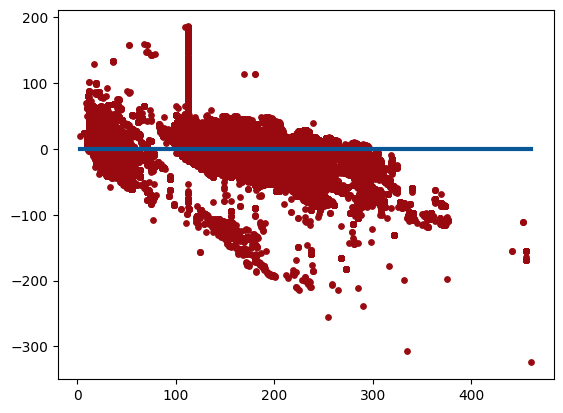

In [57]:
#Analyze the distribution of the residus
residus=model_1.predict(X_train)-y_train
plt.scatter(y_train, residus, color= '#980a10', s=15)
plt.plot((y_train.min(),y_train.max()),(0,0), lw=3, color='#0a5798')

((array([-5.16081619, -4.99224265, -4.90140318, ...,  4.90140318,
          4.99224265,  5.16081619]),
  array([-22.55078095, -21.29212679, -17.79955076, ...,  12.89632621,
          12.90433857,  12.91241884])),
 (0.9679388154406346, -5.1809193471085206e-17, 0.9679379036676674))

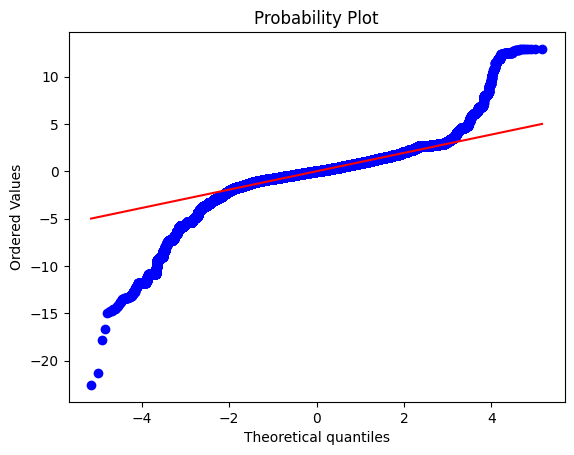

In [58]:
#Analyze the probability plot of the residus
residus_norm=(residus-residus.mean())/residus.std()
fig = plt.figure()
stats.probplot(residus_norm, plot=plt)

### 1.2 Ridge Regression

In [59]:
#Search for the best parameter for Ridge and train the model
from sklearn.linear_model import RidgeCV
ridge_reg=RidgeCV(alphas=(0.001,0.01,0.1,0.3,0.7,1,10,50,100))
ridge_reg.fit(X_train, y_train)

print("alpha selected by c-v :", ridge_reg.alpha_)


alpha selected by c-v : 10.0


In [60]:
#Evaluate the model
evaluate_model(ridge_reg, X_train, y_train, X_test, y_test, X_2021, y_2021)

score train: 0.8684068948997083
score test: 0.8686535420516948
score test sur les données de 2021: 0.8684563358078368
rmse train: 14.382080971807767
rmse test sur les données 2021: 14.383288159877061
Time taken for training prediction: 0.06617522239685059 seconds


### 1.3 Lasso Regression

In [61]:
#Train the Lasso Regression model
from sklearn.linear_model import Lasso
lasso_r=Lasso(alpha=0.1)
lasso_r.fit(X_train, y_train)

Lasso(alpha=0.1)

In [62]:
#Evaluate the model
evaluate_model(lasso_r, X_train, y_train, X_test, y_test, X_2021, y_2021)

score train: 0.8682433813141294
score test: 0.8684725954582078
score test sur les données de 2021: 0.8682893280466365
rmse train: 14.391013565777955
rmse test sur les données 2021: 14.392415770924883
Time taken for training prediction: 0.0659487247467041 seconds


### 1.4 Interpretability for regression

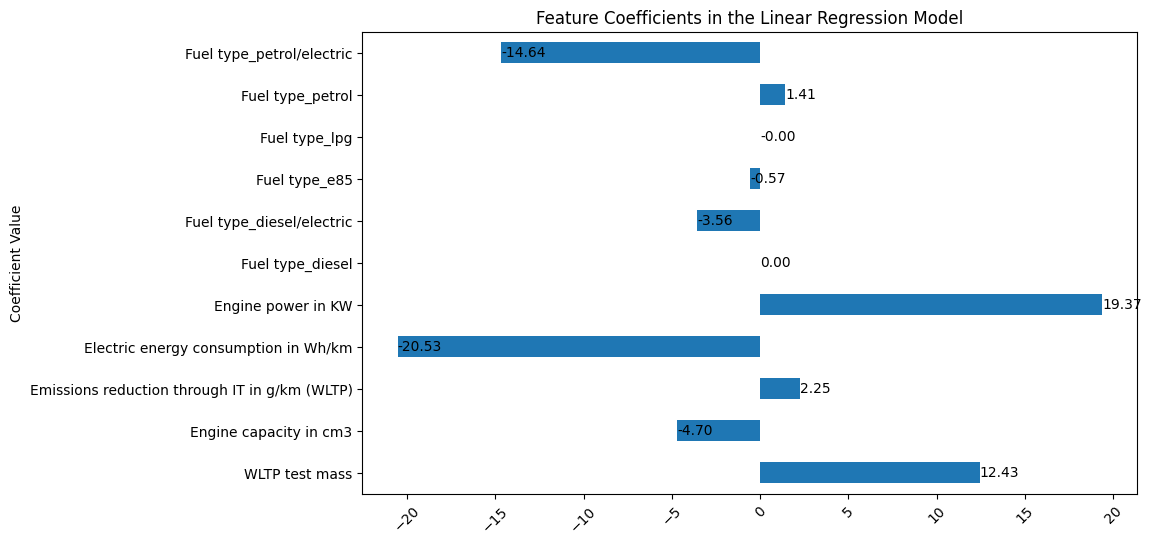

In [63]:
#Analyze the coefficients of the regression model
coefficients = pd.Series(lasso_r.coef_, index=feature_names)

plt.figure(figsize=(10, 6))
ax = coefficients.plot(kind='barh')
plt.title('Feature Coefficients in the Linear Regression Model')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)

# Annotating the bars with coefficient values
for i, v in enumerate(coefficients):
    ax.text(v, i, f'{v:.2f}', va='center')

plt.show()

## **2. Classification**

In [64]:
df_classification_2021=df_selected_2021.copy()
df_classification=df_selected.copy()

In [65]:
#Create a function to segment the data according to segment in classes
def categorize_co2_emissions(df, co2_column, bins, labels):
    """
    Categorizes CO2 emissions into different bins and returns the counts in each category as percentages.

    Parameters:
    df (pd.DataFrame): The dataframe containing CO2 emissions data.
    co2_column (str): The column name for CO2 emissions in g/km (WLTP).
    bins (list): The list of bin edges for categorizing CO2 emissions.
    labels (list): The numerical labels for each bin.

    Returns:
    pd.Series: A series containing the percentage of elements in each CO2 emission category.
    pd.DataFrame: The updated dataframe with the new 'CO2 Emission Category' column.
    """
    # Create the 'CO2 Emission Category' column using the provided bins and labels
    df['CO2 Emission Category'] = pd.cut(df[co2_column],
                                         bins=bins,
                                         labels=labels,
                                         include_lowest=True)

    # Convert the category labels to integers
    df['CO2 Emission Category'] = df['CO2 Emission Category'].astype(int)

    # Count the number of elements in each category and calculate percentages
    class_counts = df['CO2 Emission Category'].value_counts(normalize=False).sort_index() * 100

    return class_counts, df


Class Counts in Percentage with actual classification:
 CO2 Emission Category
0     70540800
1    320015800
2    243365500
3     38442600
4     18437400
5      8274900
6      5697500
Name: count, dtype: int64


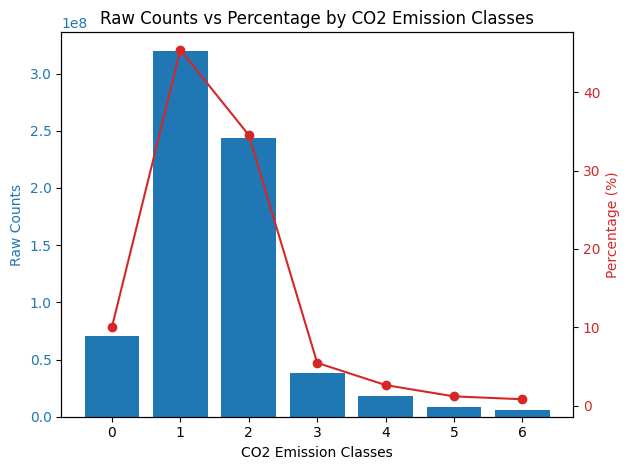

In [66]:
#Segment the target variable of the main data of 2022 as a function of the numer of classes

# Define the bins based on the CO2 emission ranges
bins_old = [0, 100, 130, 160, 190,220,250, float('inf')]
# Use numerical labels starting from 0
labels_old = [0, 1, 2, 3, 4,5,6]


class_counts, df_classification = categorize_co2_emissions(df_classification,
                                                           'Specific CO2 Emissions in g/km (WLTP)',
                                                           bins_old,
                                                           labels_old)

# Display the results
print("Class Counts in Percentage with actual classification:\n", class_counts)

# Define the bins based on the CO2 emission ranges
bins = [0,100,115, 130,145,160, 190, float('inf')]
# Use numerical labels starting from 0
labels = [0, 1, 2, 3, 4,5,6]

bins=bins_old
labels=labels_old

class_counts, df_classification = categorize_co2_emissions(df_classification,
                                                           'Specific CO2 Emissions in g/km (WLTP)',
                                                           bins,
                                                           labels)

# Sample data (replace these with your actual values)
x = range(len(class_counts))  # x-axis values (CO2 emission classes)
raw_counts = class_counts  # Non-normalized data (raw class counts)
percentages = (raw_counts / np.sum(raw_counts)) * 100  # Convert raw counts to percentages

# Create the figure and axis
fig, ax1 = plt.subplots()

# Plot the raw counts on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('CO2 Emission Classes')
ax1.set_ylabel('Raw Counts', color=color)
ax1.bar(x, raw_counts, color=color, label='Raw Counts')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the percentages
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage (%)', color=color)
ax2.plot(x, percentages, color=color, label='Percentage', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and labels
ax1.set_title('Raw Counts vs Percentage by CO2 Emission Classes')

# Set x-ticks to match the CO2 classes
ax1.set_xticks(x)
ax1.set_xticklabels(labels)  # Replace 'labels' with the appropriate list of labels

# Display the plot
fig.tight_layout()  # Adjust layout to fit both y-axes properly
plt.show()

In [67]:
#Segment the target variable of the data of 2021

class_counts, df_classification_2021 = categorize_co2_emissions(df_classification_2021,
                                                           'Specific CO2 Emissions in g/km (WLTP)',
                                                           bins,
                                                           labels)



In [68]:
#Remove the column on the specicific CO2 emission
df_classification_2021.drop('Specific CO2 Emissions in g/km (WLTP)', axis=1,inplace=True)
df_classification.drop('Specific CO2 Emissions in g/km (WLTP)', axis=1,inplace=True)
df_classification.head()

,WLTP test mass,Engine capacity in cm3,Emissions reduction through IT in g/km (WLTP),Electric energy consumption in Wh/km,Engine power in KW,Fuel type_diesel,Fuel type_diesel/electric,Fuel type_e85,Fuel type_lpg,Fuel type_petrol,Fuel type_petrol/electric,CO2 Emission Category
0,1446.0,999.0,1.70,0.0,74.0,0,0,0,1,0,0,1
1,1782.0,2487.0,0.80,0.0,131.0,0,0,0,0,1,0,1
2,1576.0,1199.0,2.00,0.0,96.0,0,0,0,0,1,0,2
3,1814.0,1598.0,0.59,0.0,132.0,0,0,0,0,1,0,2
4,1640.0,1987.0,0.80,0.0,112.0,0,0,0,0,1,0,1


In [69]:
#Separate the data in train and test data
data=df_classification.drop('CO2 Emission Category', axis=1)
target=df_classification['CO2 Emission Category']
X_train,X_test,y_train,y_test=train_test_split(data,target, test_size=0.2, random_state=66)
X_2021=df_classification_2021.drop('CO2 Emission Category', axis=1)
y_2021=df_classification_2021['CO2 Emission Category']

### Undersampling

In [70]:
#Do a first undersampling of the data set
rUs=RandomUnderSampler()
X_ru,y_ru=rUs.fit_resample(X_train,y_train)
print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))

Classes échantillon undersampled : {0: 45729, 1: 45729, 2: 45729, 3: 45729, 4: 45729, 5: 45729, 6: 45729}


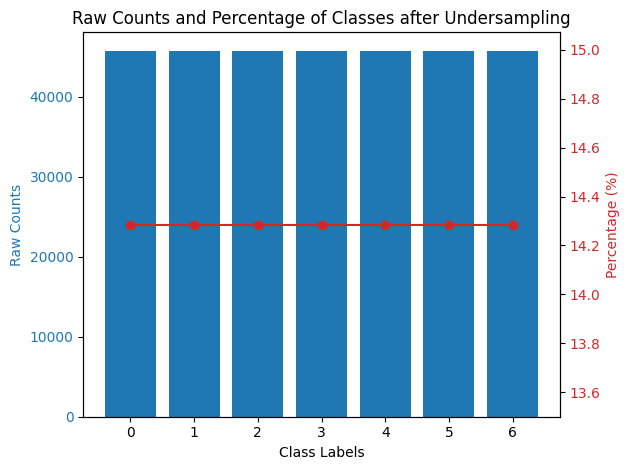

In [71]:
#Plot te data to visualize the data distribution across classes

# Get the counts of each class after undersampling
class_counts = pd.Series(y_ru).value_counts()

# Calculate percentages
percentages = (class_counts / class_counts.sum()) * 100

# Plot the raw counts on the first y-axis
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Class Labels')
ax1.set_ylabel('Raw Counts', color=color)
ax1.bar(class_counts.index, class_counts.values, color=color, label='Raw Counts')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the percentages
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Percentage (%)', color=color)
ax2.plot(class_counts.index, percentages, color=color, label='Percentage', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
ax1.set_title('Raw Counts and Percentage of Classes after Undersampling')

# Display the plot
fig.tight_layout()
plt.show()

In [72]:
#Second undersampling of the main data, the data of 2022
from collections import Counter

# First, let's see the current class distribution
current_distribution = Counter(y_ru)
print("Current class distribution:", current_distribution)

# Calculate the desired number of samples for each class
# This will reduce each class by half
sampling_strategy = {class_label: count // 2 for class_label, count in current_distribution.items()}

# Create the undersampler with this strategy
rUs_second = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

# Perform the second round of undersampling
X_ru_second, y_ru_second = rUs_second.fit_resample(X_ru, y_ru)

# Print the class distribution after the second undersampling
print('Classes after second undersampling:', dict(pd.Series(y_ru_second).value_counts()))

Current class distribution: Counter({0: 45729, 1: 45729, 2: 45729, 3: 45729, 4: 45729, 5: 45729, 6: 45729})
Classes after second undersampling: {0: 22864, 1: 22864, 2: 22864, 3: 22864, 4: 22864, 5: 22864, 6: 22864}


In [78]:
#Undersampling of the data of 2021.
from collections import Counter
print('Initial data distribution :', dict(pd.Series(y_test).value_counts()))

rUs_test=RandomUnderSampler()
X_ru,y_ru=rUs_test.fit_resample(X_test,y_test)

# First, let's see the current class distribution
current_distribution = Counter(y_ru)
print("Current class distribution:", current_distribution)

# Calculate the desired number of samples for each class
# This will reduce each class by half
sampling_strategy = {class_label: count // 2 for class_label, count in current_distribution.items()}

# Create the undersampler with this strategy
rUs_second = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

# Perform the second round of undersampling
X_test_ru, y_test_ru = rUs_second.fit_resample(X_ru,y_ru)

# Print the class distribution after the second undersampling
print('Classes after second undersampling:', dict(pd.Series(y_test_ru).value_counts()))

Initial data distribution : {0: 5623, 1: 5623, 2: 5623, 3: 5623, 4: 5623, 5: 5623, 6: 5623}
Current class distribution: Counter({0: 5623, 1: 5623, 2: 5623, 3: 5623, 4: 5623, 5: 5623, 6: 5623})
Classes after second undersampling: {0: 2811, 1: 2811, 2: 2811, 3: 2811, 4: 2811, 5: 2811, 6: 2811}


In [77]:
#Scaling of the data
X_train,y_train=X_ru_second,y_ru_second
X_test,y_test=X_test_ru,y_test_ru
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_2021=scaler.transform(X_2021)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 2.1 Logistic Regression

In [ ]:
#Train the model
clf=linear_model.LogisticRegression(C=0.1)
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [ ]:
#Evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
start_train = time.time()
y_pred=clf.predict(X_test)
end_train = time.time()
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[4824  777   10    6    1    0    5]
 [ 245 3989 1184  196    3    5    1]
 [  56  996 3836  690   41    4    0]
 [   9   54  594 3844  824  295    3]
 [   5    0   58 1384 2869 1282   25]
 [   4    0    0  126 1938 3039  516]
 [   0    0    1    5  152 1438 4027]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      5623
           1       0.69      0.71      0.70      5623
           2       0.67      0.68      0.68      5623
           3       0.61      0.68      0.65      5623
           4       0.49      0.51      0.50      5623
           5       0.50      0.54      0.52      5623
           6       0.88      0.72      0.79      5623

    accuracy                           0.67     39361
   macro avg       0.68      0.67      0.68     39361
weighted avg       0.68      0.67      0.68     39361

Time taken for prediction: 0.003785848617553711 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "Logistic_Regression_results_", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/Logistic_Regression_results_.xlsx'


### 2.2  Logistic Regression with Grid Search

In [ ]:
#Do Grid Search with Logistic Regression

# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10],  # Regularization strength (inverse of regularization)
    'penalty': ['l1','l2'],  # L1 for Lasso, L2 for Ridge
    'solver': ['saga']    # Solver for small datasets and L1 regularization
}

# Set up the LogisticRegression model
clf = LogisticRegression()

# Set up GridSearchCV with cross-validation (2-fold by default)
grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='accuracy')

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Use the best estimator for predictions
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, penalty='l1', solver='saga')

In [ ]:
#Evaluate the model

start_train = time.time()
y_pred=best_clf.predict(X_test)
end_train = time.time()
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[5397  204    5   10    0    5    2]
 [ 261 3967 1184  204    1    6    0]
 [  38  939 3886  711   44    5    0]
 [   5   63  627 3791  827  304    6]
 [   2    0    6 1393 2908 1283   31]
 [   3    0    0  170 1919 3053  478]
 [   0    0    1    5  152 1438 4027]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5623
           1       0.77      0.71      0.73      5623
           2       0.68      0.69      0.69      5623
           3       0.60      0.67      0.64      5623
           4       0.50      0.52      0.51      5623
           5       0.50      0.54      0.52      5623
           6       0.89      0.72      0.79      5623

    accuracy                           0.69     39361
   macro avg       0.70      0.69      0.69     39361
weighted avg       0.70      0.69      0.69     39361

Time taken for prediction: 0.005198955535888672 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "Logistic_Regression_GridSearch_", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/Logistic_Regression_GridSearch_.xlsx'


### 2.3  SVM

In [ ]:
#Train the model
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)


LinearSVC()

In [ ]:
#Evaluate the model
start_train = time.time()
y_pred=clf.predict(X_test)
end_train = time.time()
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[4877  734    0    4    0    8    0]
 [ 256 4537  582  130  113    3    2]
 [  41 2157 2812  235  370    8    0]
 [   5  123 2213 1077 1595  443  167]
 [ 136    0  560  224 2964 1188  551]
 [   3    2    0   79 2162 1045 2332]
 [   0    0    2    0  415  208 4998]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5623
           1       0.60      0.81      0.69      5623
           2       0.46      0.50      0.48      5623
           3       0.62      0.19      0.29      5623
           4       0.39      0.53      0.45      5623
           5       0.36      0.19      0.25      5623
           6       0.62      0.89      0.73      5623

    accuracy                           0.57     39361
   macro avg       0.57      0.57      0.54     39361
weighted avg       0.57      0.57      0.54     39361

Time taken for prediction: 0.011489629745483398 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "SVM_", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/SVM_.xlsx'


### 2.4  SVM and GridSearch

In [ ]:
#Do Grid Search with SVM

# Define the parameter grid you want to search over
param_grid = {
    'C': [0.01, 0.1, 0.5],  # Example of values for the regularization parameter C
    'max_iter': [1000, 5000]  # Number of iterations
}

# Create a LinearSVC model
clf = LinearSVC()

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='accuracy')  # cv=5 for 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# The best model found by grid search
best_model = grid_search.best_estimator_


In [ ]:
#Evaluate the model
start_train = time.time()
y_pred=best_model.predict(X_test)
end_train = time.time()
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[4877  734    0    4    0    8    0]
 [ 256 4537  582  130  113    3    2]
 [  41 2157 2812  235  370    8    0]
 [   6  123 2213 1076 1595  443  167]
 [ 136    0  560  224 2964 1188  551]
 [   3    2    0   79 2162 1045 2332]
 [   0    0    2    0  415  208 4998]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5623
           1       0.60      0.81      0.69      5623
           2       0.46      0.50      0.48      5623
           3       0.62      0.19      0.29      5623
           4       0.39      0.53      0.45      5623
           5       0.36      0.19      0.25      5623
           6       0.62      0.89      0.73      5623

    accuracy                           0.57     39361
   macro avg       0.57      0.57      0.54     39361
weighted avg       0.57      0.57      0.54     39361

Time taken for prediction: 0.011489391326904297 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "SVM_GridSearch", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/SVM_GridSearch.xlsx'


### 2.5  KNN

In [ ]:
#Train the model
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Evaluate the model
start_train = time.time()
y_pred=knn.predict(X_test)
end_train = time.time()
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[5612   10    0    1    0    0    0]
 [   9 5312  286   14    0    2    0]
 [   1  293 5130  196    3    0    0]
 [   3    9  179 5222  201    9    0]
 [   1    0    2  262 5108  240   10]
 [   3    0    0   27  485 5025   83]
 [   1    0    2    4    4  224 5388]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5623
           1       0.94      0.94      0.94      5623
           2       0.92      0.91      0.91      5623
           3       0.91      0.93      0.92      5623
           4       0.88      0.91      0.89      5623
           5       0.91      0.89      0.90      5623
           6       0.98      0.96      0.97      5623

    accuracy                           0.93     39361
   macro avg       0.94      0.93      0.93     39361
weighted avg       0.94      0.93      0.93     39361

Time taken for prediction: 16.52265977859497 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "KNN", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/KNN.xlsx'


### 2.6  Decision Tree

In [ ]:
#Train the model
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=123)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=123)

In [ ]:
#Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report
start_train = time.time()
y_pred=dt_clf.predict(X_test)
end_train = time.time()
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[5582   20    5    0    0    5   11]
 [ 257 3533 1752   54   25    2    0]
 [   1  278 4394  750  200    0    0]
 [   3    0  456 3699 1352  113    0]
 [   1    0   23  736 3884  963   16]
 [   3    0    0  157  629 4267  567]
 [   0    0    1   11  394  324 4893]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5623
           1       0.92      0.63      0.75      5623
           2       0.66      0.78      0.72      5623
           3       0.68      0.66      0.67      5623
           4       0.60      0.69      0.64      5623
           5       0.75      0.76      0.76      5623
           6       0.89      0.87      0.88      5623

    accuracy                           0.77     39361
   macro avg       0.78      0.77      0.77     39361
weighted avg       0.78      0.77      0.77     39361

Time taken for prediction: 0.004253864288330078 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "Decision Tree", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/Decision Tree.xlsx'


### 2.7  Boosting  

In [79]:
#Train the model
dtc=DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train, y_train)
ac = AdaBoostClassifier(estimator=dtc, n_estimators=100)
ac.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                   n_estimators=100)

In [80]:
#Evaluate the model
start_train = time.time()
y_pred=ac.predict(X_test)
end_train = time.time()
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[5511  112    0    0    0    0    0]
 [   2 5125  483   11    0    2    0]
 [   1 1444 3900  277    0    1    0]
 [   3   13  468 4601  505   33    0]
 [   1    0    1  798 4301  518    4]
 [   3    0    0    4  787 4496  333]
 [   1    0    2    3   16  308 5293]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5623
           1       0.77      0.91      0.83      5623
           2       0.80      0.69      0.74      5623
           3       0.81      0.82      0.81      5623
           4       0.77      0.76      0.77      5623
           5       0.84      0.80      0.82      5623
           6       0.94      0.94      0.94      5623

    accuracy                           0.84     39361
   macro avg       0.85      0.84      0.84     39361
weighted avg       0.85      0.84      0.84     39361

Time taken for prediction: 0.5032835006713867 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "Boosting", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/Boosting.xlsx'


### 2.8  Bagging

In [ ]:
#Train the model
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(n_estimators=200,oob_score=True)
bc.fit(X_train, y_train)

BaggingClassifier(n_estimators=200, oob_score=True)

In [ ]:
#Evaluate the model
start_train = time.time()
y_pred=bc.predict(X_test)
end_train = time.time()
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[5612    7    0    4    0    0    0]
 [   5 5336  270    9    1    2    0]
 [   1  200 5234  187    0    1    0]
 [   2    6  167 5233  201   14    0]
 [   1    1    1  188 5114  311    7]
 [   3    0    0   14  244 5213  149]
 [   0    1    2    4    5  151 5460]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5623
           1       0.96      0.95      0.96      5623
           2       0.92      0.93      0.93      5623
           3       0.93      0.93      0.93      5623
           4       0.92      0.91      0.91      5623
           5       0.92      0.93      0.92      5623
           6       0.97      0.97      0.97      5623

    accuracy                           0.95     39361
   macro avg       0.95      0.95      0.95     39361
weighted avg       0.95      0.95      0.95     39361

Time taken for prediction: 1.0576605796813965 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "Bagging", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/Bagging.xlsx'


### 2.9  Random Forest

In [ ]:
#Train the model
clf_RF=ensemble.RandomForestClassifier(n_jobs=-1,random_state=321)
clf_RF.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=321)

In [ ]:
#Evaluate the model
start_train = time.time()
y_pred=clf_RF.predict(X_test)
end_train = time.time()
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[5615    7    0    1    0    0    0]
 [   5 5345  261    9    1    2    0]
 [   1  195 5241  186    0    0    0]
 [   3    4  161 5253  191   11    0]
 [   1    1    1  183 5125  305    7]
 [   3    0    0   16  252 5209  143]
 [   0    0    2    4    6  147 5464]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5623
           1       0.96      0.95      0.96      5623
           2       0.92      0.93      0.93      5623
           3       0.93      0.93      0.93      5623
           4       0.92      0.91      0.92      5623
           5       0.92      0.93      0.92      5623
           6       0.97      0.97      0.97      5623

    accuracy                           0.95     39361
   macro avg       0.95      0.95      0.95     39361
weighted avg       0.95      0.95      0.95     39361

Time taken for prediction: 0.08020591735839844 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "Random_Forest", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/Random_Forest.xlsx'


### 2.10  Voting Classifier

In [ ]:
#Train the model
clf1=KNeighborsClassifier(n_neighbors=3)
clf2=RandomForestClassifier(random_state=123)
clf3=LogisticRegression(max_iter=1000)


In [ ]:
#Do the voting
from sklearn.ensemble import VotingClassifier, StackingClassifier
vclf=VotingClassifier(estimators=[('knn',clf1),('rf',clf2),('lr',clf3)],voting='hard')
from sklearn.model_selection import KFold,cross_validate

cv3=KFold(n_splits=3,random_state=111,shuffle=True)

for clf, label in zip([clf1, clf2, clf3, vclf], ['KNN','Random Forest','Logistic Regression','Voting Classifier']):
    scores=cross_validate(clf, X_train, y_train, cv=cv3, scoring=['accuracy','f1_macro'])
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
          "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))


### 2.11 Stacking Classifier

In [ ]:
# Train the model
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', clf3)], final_estimator=clf3)

scores = cross_validate(sclf, X_train, y_train, cv=cv3, scoring=['accuracy', 'f1_macro'])

print("[StackingClassifier]: \n Accuracy: %0.2f (+/- %0.2f)\n" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
      "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))

### 2.12  Xg Boost

In [ ]:
# Train and evaluate the model
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb_clf.fit(X_train, y_train)

# Make predictions and measure time
start_train = time.time()
y_pred = xgb_clf.predict(X_test)
end_train = time.time()

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", end_train - start_train, "seconds")

[[5617    6    0    0    0    0    0]
 [  40 4876  688   15    1    3    0]
 [   2  337 5011  272    1    0    0]
 [   9    3  224 5012  349   26    0]
 [   4    0    0  205 4997  414    3]
 [   4    0    0   13  374 5085  147]
 [   0    0    2    3    4  214 5400]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5623
           1       0.93      0.87      0.90      5623
           2       0.85      0.89      0.87      5623
           3       0.91      0.89      0.90      5623
           4       0.87      0.89      0.88      5623
           5       0.89      0.90      0.89      5623
           6       0.97      0.96      0.97      5623

    accuracy                           0.91     39361
   macro avg       0.92      0.91      0.91     39361
weighted avg       0.92      0.91      0.91     39361

Time taken for prediction: 0.07892656326293945 seconds


In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "XgBoost", cm, cr, time_taken)

Evaluation results have been saved to '/content/drive/MyDrive/Data_Scientest/Model_withoutFC/XgBoost.xlsx'


### 2.13 Neural Network

##### Architecture 64-32-7

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5002/5002 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6943 - loss: 0.7378 - val_accuracy: 0.7805 - val_loss: 0.5053
Epoch 2/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8004 - loss: 0.4825 - val_accuracy: 0.8062 - val_loss: 0.4806
Epoch 3/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8172 - loss: 0.4429 - val_accuracy: 0.8206 - val_loss: 0.4317
Epoch 4/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8243 - loss: 0.4265 - val_accuracy: 0.8330 - val_loss: 0.4168
Epoch 5/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8303 - loss: 0.4138 - val_accuracy: 0.8335 - val_loss: 0.4155
Epoch 6/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8376 - loss: 0.4025 - val_accuracy: 0.8333 - val_loss: 0.4068
Epoch 7/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8395 - loss: 0.3967 - val_accuracy: 0.8465 - val_loss: 0.3909
Epoch 8/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8435 - loss: 0.3877 - val_accura

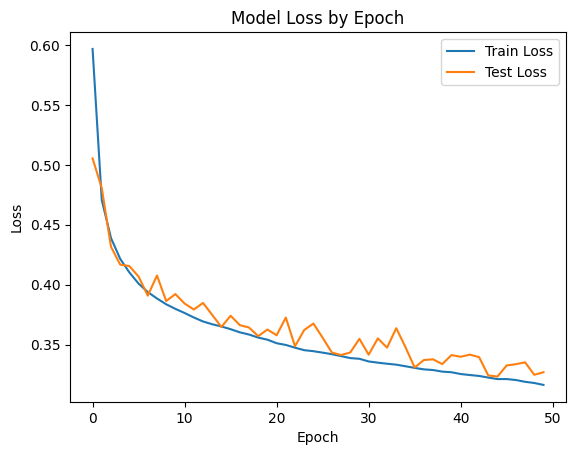

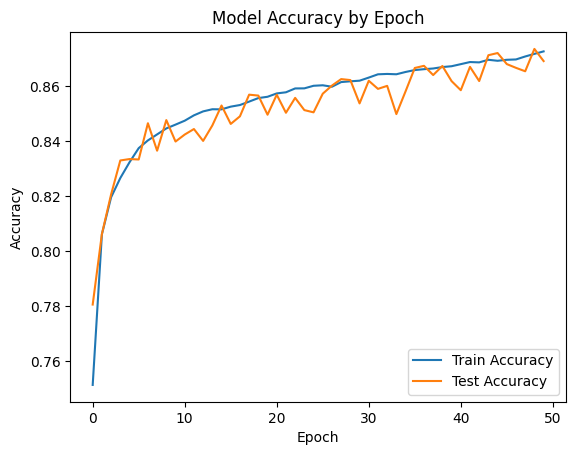

In [81]:
#Train and evaluate the model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
import numpy as np
import time

# Convert y_train and y_test to categorical if it's a multi-class classification
num_classes = len(np.unique(y_train))  # Number of unique classes
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Define the Keras model
model = Sequential()

# Input layer (number of features should match the number of columns in X_train)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))  # Add as many layers as necessary

# Output layer (number of units should match the number of classes for classification)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model (categorical crossentropy for multiclass, accuracy as a metric)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store history
history = model.fit(X_train, y_train_categorical,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test_categorical),
                    verbose=1)

# Predictions
start_train = time.time()
y_pred_probs = model.predict(X_test)  # Probabilities from the softmax layer
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to predicted class labels
end_train = time.time()

# Evaluation: Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", time_taken, "seconds")

# Plot model loss by epoch
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss by Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot model accuracy by epoch
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy by Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "Neural Network_FirstArchi", cm, cr, time_taken)

ValueError: DataFrame constructor not properly called!

##### Architecture 128-32-7

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5002/5002 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7078 - loss: 0.7094 - val_accuracy: 0.7938 - val_loss: 0.4946
Epoch 2/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8123 - loss: 0.4649 - val_accuracy: 0.8295 - val_loss: 0.4293
Epoch 3/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8274 - loss: 0.4279 - val_accuracy: 0.8320 - val_loss: 0.4205
Epoch 4/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8320 - loss: 0.4168 - val_accuracy: 0.8223 - val_loss: 0.4355
Epoch 5/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8370 - loss: 0.3967 - val_accuracy: 0.8391 - val_loss: 0.3894
Epoch 6/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8421 - loss: 0.3882 - val_accuracy: 0.8485 - val_loss: 0.3769
Epoch 7/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8443 - loss: 0.3839 - val_accuracy: 0.8526 - val_loss: 0.3763
Epoch 8/50
5002/5002 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8480 - loss: 0.3738 - val_accura

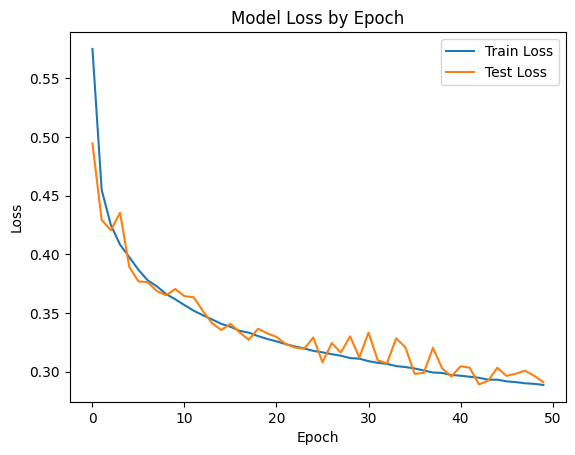

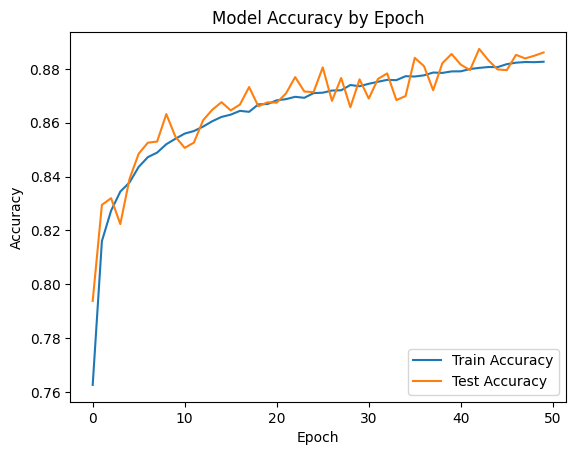

In [ ]:
#Train and evaluate the model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
import numpy as np
import time

# Assuming X_train, X_test, y_train, and y_test are already prepared

# Convert y_train and y_test to categorical if it's a multi-class classification
num_classes = len(np.unique(y_train))  # Number of unique classes
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Define the Keras model
model = Sequential()

# Input layer (number of features should match the number of columns in X_train)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))  # Add as many layers as necessary

# Output layer (number of units should match the number of classes for classification)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model (categorical crossentropy for multiclass, accuracy as a metric)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store history
history = model.fit(X_train, y_train_categorical,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test_categorical),
                    verbose=1)

# Predictions
start_train = time.time()
y_pred_probs = model.predict(X_test)  # Probabilities from the softmax layer
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to predicted class labels
end_train = time.time()

# Evaluation: Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cr_ = classification_report(y_test, y_pred)
time_taken = end_train - start_train
print(cm)
print(cr_)
print("Time taken for prediction:", time_taken, "seconds")

# Plot model loss by epoch
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss by Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot model accuracy by epoch
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy by Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

#### Architecture 64-64-32-7

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4002/4002 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7109 - loss: 0.6741 - val_accuracy: 0.2435 - val_loss: 20.6762
Epoch 2/50
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8028 - loss: 0.4644 - val_accuracy: 0.2484 - val_loss: 21.5219
Epoch 3/50
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8219 - loss: 0.4266 - val_accuracy: 0.2275 - val_loss: 21.7986
Epoch 4/50
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8344 - loss: 0.4015 - val_accuracy: 0.2412 - val_loss: 22.8277
Epoch 5/50
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8389 - loss: 0.3878 - val_accuracy: 0.2579 - val_loss: 24.4076
Epoch 6/50
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8457 - loss: 0.3730 - val_accuracy: 0.2453 - val_loss: 24.4459
Epoch 7/50
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8523 - loss: 0.3626 - val_accuracy: 0.2543 - val_loss: 25.2263
Epoch 8/50
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8548 - loss: 0.3576 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


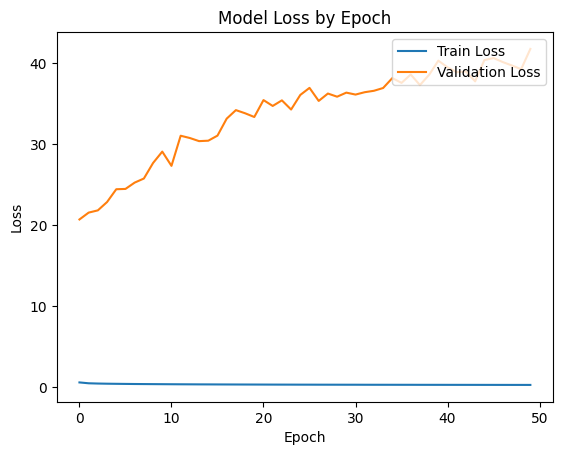

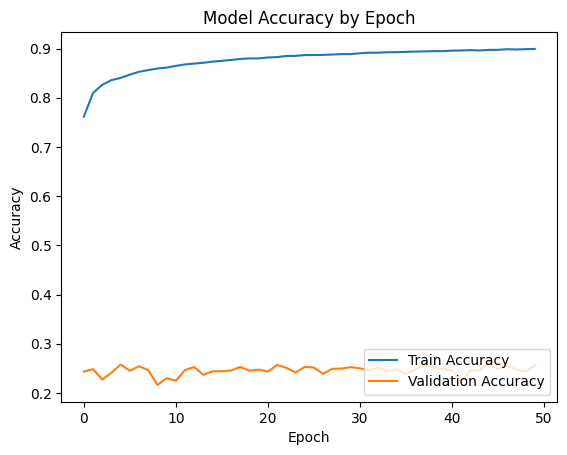

In [ ]:
#Train and evaluate the model
import numpy as np
import time
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already prepared

# Verify and adjust label encoding if necessary
unique_classes = np.unique(np.concatenate((y_train, y_test)))
class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
y_train_mapped = np.array([class_mapping[label] for label in y_train])
y_test_mapped = np.array([class_mapping[label] for label in y_test])

num_classes = len(unique_classes)

# Convert labels to categorical
y_train_categorical = to_categorical(y_train_mapped, num_classes)
y_test_categorical = to_categorical(y_test_mapped, num_classes)

# Define the Keras model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Default learning rate
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model and capture history
history = model.fit(
    X_train_scaled, y_train_categorical,
    epochs=50,                # Start with 50 epochs
    batch_size=32,
    verbose=1,
    validation_split=0.2      # Use validation data to monitor overfitting
)

# Predictions
start_time = time.time()
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)
end_time = time.time()

# Evaluation: Confusion Matrix and Classification Report
cm = confusion_matrix(y_test_mapped, y_pred)
cr = classification_report(y_test_mapped, y_pred)
time_taken = end_time - start_time

print(cm)
print(cr)
print("Time taken for prediction:", time_taken, "seconds")

# Plot model loss by epoch
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss by Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot model accuracy by epoch
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy by Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Write the output in .csv format in order to copy paste it in the report
write_performancemetrics_excel(data_scientist_path, "Neural Network Improved", cm, cr, time_taken)

### 2.14 Interpretability

In [ ]:
#PCA analysis

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

n = X_train.shape[1]

pca = PCA(n_components=2)
scaler = StandardScaler()
pipeline_pca = Pipeline(steps = [('normalization', scaler), ('pca', pca)])
X_new = pipeline_pca.fit_transform(X_train)
coeff = pca.components_.transpose()

xs = X_new[:, 0]
ys = X_new[:, 1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

principalDf = pd.DataFrame({'PC1': xs*scalex, 'PC2': ys * scaley})
y_train_pred = clf_RF.predict(X_train)
finalDF = pd.concat([principalDf, pd.Series(y_train_pred, name='CO2 emission class')], axis=1)

plt.figure(figsize=(13, 10))
plt.title('PCA of CO2 emission data')

sns.scatterplot(x='PC1', y='PC2', hue='CO2 emission class', data=finalDF, alpha=0.5)

for i in range(n):
    plt.arrow(0, 0, coeff[i, 0]*1.5, coeff[i, 1]*1.5, color='red', alpha=0.5, head_width=0.01)
    plt.text(coeff[i, 0]*1.5, coeff[i, 1] * 1.5, feature_names[i], color='red')

plt.xlim(-0.6, 0.8)
plt.ylim(-0.8, 0.8)

# Save the image as a PNG file
plt.savefig('pca_plot.png')

plt.show()

In [ ]:
#SHAP analysis

# If X_test is not already a DataFrame, convert it to one with actual feature names
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Calculate SHAP values for multiclass classification
explainer = shap.TreeExplainer(clf_RF)  # Replace 'model' with your actual model
shap_values = explainer.shap_values(X_test[0:100])

print("Shape of shap_values:", np.array(shap_values).shape)
print("Shape of X_test:", X_test[0:100].shape)

# Reshape shap_values to match the expected format
n_samples, n_features, n_classes = shap_values.shape
reshaped_shap_values = [shap_values[:, :, i] for i in range(n_classes)]

# For each class, generate the SHAP summary plot
for i in range(n_classes):
    print(f"Class {i} SHAP summary plot")
    plt.figure(figsize=(12, 8))
    shap.summary_plot(reshaped_shap_values[i], X_test[0:100], plot_type="bar",  feature_names=feature_names, show=False)
    plt.title(f"SHAP Feature Importance for Class {i}")
    plt.tight_layout()
    plt.show()

# Overall feature importance across all classes
print("Overall SHAP summary plot")
plt.figure(figsize=(12, 8))
shap.summary_plot(reshaped_shap_values, X_test[0:100], plot_type="bar", feature_names=feature_names,show=False)
plt.title("Overall SHAP Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test[0:100], plot_type="bar",  feature_names=feature_names, show=False)#, class_names=xgb_clf.classes_)
plt.title("SHAP Summary Plot for All Classes")
plt.tight_layout()
plt.show()